
# Introduction to Clustering and K-Means
---

### Learning Objectives
*After this lesson, you will be able to:*
- Understand basic unsupervised clustering problems
- Format and preprocess data for cluster
- Perform a K-Means Clustering Analysis
- Evaluate clusters for fit 



### Lesson Guide
- [Unsupervised learning](#unsupervised)
- [Introduction to clustering](#intro)
- [What is clustering?](#what)
- [KNN review](#knn)
- [Clustering algorithms](#algos)
- [K-means clustering](#k-means)
- [K-Means step-by-step](#km-steps)
- [K-Means: a visual example](#vis)
- [K-Means caveats and pitfalls](#caveats)
    - [Sensitive to outliers](#sensitive)
    - [Sensitive to centroid initialization](#centroid-init)
    - [How many K?](#how-many-k)
- [Choosing K](#choose-k)
- [A note on K-Means convergence](#converge)
- [K-Means in sklearn](#kmeans-skl)
    - [Visually verifying cluster labels](#verify)
- [Metrics: inertia and the silhouette coefficient](#sil)
- [Practice: use K-Means on the "Isotopic Composition Plutonium Batches" data](#pluto)
    - [How does scaling affect fit?](#scaling)
- [Conclusion: K-Means tradeoffs](#conclusion)
- [Additional resources](#resources)

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 

<a id='unsupervised'></a>

## Unsupervised learning

---
 
> **Supervised --> Classification** - create a model to predict which group or class or label a point belongs to.  
> **Supervised --> Regression** - create a model to predict a metric.

> **Unsupervised --> Clustering** - find groups that may exist in the data already.

Until now, we haven't talked about unsupervised learning. We use unsupervised methods when **we don't have labeled data**. 
- There are no true targets to predict.

We derive the possible or likely categories from the structure in our data.

## What do we mean by "labeled data"?
- Give me some examples!

<a id='what'></a>
## What is Clustering? 

---

<img src="https://snag.gy/BdfATE.jpg" style="width: 500px">

Clustering is one of the most ubiquitous and widespread processes for assigning **discrete structure to data**. In clustering, we group observations in a dataset together such that the members of a group are **more similar to each other** than they are to members of other groups. There are a **wide variety of methods** and criteria to perform this task.

**Properties of clustering procedures:**
- No **"true" target (`y`)** / response to compare
- We apply structure to data quantitatively based on **specific criteria**
- Predictions of label are based **on the structure of the data**

**For example:** your employer gives you a dataset of voter preferences from a local poll. They want you to figure out just exactly **how these voters are grouping based on their preferences**. The answer: clustering!

<a name="algos"></a>
## Clustering algorithms 

---

The are [many different algorithms](http://scikit-learn.org/stable/modules/clustering.html) that can perform clustering given a dataset:

- **[K-Means](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)** (mean centroids)
- **[DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)** (density based)
- **[Hierarchical](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering)** (nested clusters by merging or splitting successively)
- **[Affinity Propagation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html)** (graph based approach to let points 'vote' on their preferred 'exemplar')
- **[Mean Shift](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html)** (can find number of clusters)
- **[Spectral Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html)**
- **[Agglomerative Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)** (suite of algorithms all based on applying the same criteria/characteristics of one cluster to others)



Today, we're going to look at one of the algorithms: **K-means.**

<a id='k-means'></a>
## K-Means clustering

---

#### [K-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) is the most popular clustering algorithm

K-means is one of the easier methods to understand. Many of the other clustering techniques use some or all of the same assumptions that K-Means relies on.

- **K** is the number of clusters.
- **Means** refers to the mean points of the K clusters.

The number of clusters $k$ is chosen in advance. By you! Yes, by you! What a time to be alive!

A goal is to partition the data into clusters **such that the total sum of squared distances** from each point to the mean point of the cluster is minimized.

(`inertia_` is calculated as the sum of squared distance for each point to its closest centroid, i.e., its assigned cluster.)

The algorithm takes your entire dataset and iterates over its features and observations to determine clusters based around center points. These center points are known as **centroids**.

**K-means iterative fitting:**
1. Pick a value for k (the number of clusters to create)
2. Initialize k 'centroids' (starting points) in your data
3. Create your clusters. Assign each point to the nearest centroid. 
4. Make your clusters better. Move each centroid to the center of its cluster. 
5. Repeat steps 3-4 until your centroids converge. 

> **Note:** Unfortunately, there is no formula to determine the absolute best number of $k$ clusters. Unsupervised learning is inherently subjective! We can, however, choose the "best" $k$ based on setting some predetermined criteria. 

<a id='euclidean'></a>
<details><summary> A reminder about Euclidean distance if/as needed</summary>

---

### $$ d(x_1, x_2) = \sqrt{\sum_{i=1}^N (x_{1i} - x_{2i})^2} $$

**For example, take two points:**

- $x1 = (2, -1, 3)$
- $x2 = (-2, 2, 3)$

**The Euclidean distance between these two points is:**

### $$\begin{aligned}
d(x1, x2) &= \sqrt{ (2 - (-2))^2 + ((-1) - 2)^2 +(3 - 3)^2} \\
d(x1, x2) &= \sqrt{25} \\
d(x1, x2) &= 5 
\end{aligned}$$

**Using sklearn:**
```python
import numpy as np
from sklearn.metrics import euclidean_distances
X = np.array([[2, -1], [-2, 2]])
print(euclidean_distances(X))
```

Another example (with the same result)...
```python
from sklearn.metrics import euclidean_distances
X = np.array([[2, -1, 3], [-2, 2, 3]])
print(euclidean_distances(X))
```
    
Or do things the "long" way...
```python
x = (2-(-2))**2 + ((-1)-2)**2+(3-3)**2
x**0.5
```   

<a id='km-steps'></a>
## K-Means step-by-step

---

<table width="700" cellpadding="50"> 
<tr>
   <td><img src="https://snag.gy/7haoS3.jpg" style="width: 150px"></td>
   <td style="vertical-align: top; width: 400px;"><br><b>Step 1.</b><br>We have data in a N-Dimensional feature space (2D for example).</td>
</tr>
<tr>
</table>

<table width=700 cellpadding="50"> 
<tr>
   <td><img src="https://snag.gy/DaIVgk.jpg" style="width: 150px !important;"></td>
   <td style="align: top; width: 400px; vertical-align: top;"><br><b>Step 2.</b><br>Intialize K centroid (2 here).</td>
</tr>
<tr>
</table>

<table width=700 cellpadding="50"> 
<tr>
   <td><img src="https://snag.gy/DaIVgk.jpg" style="width: 150px !important;"></td>
   <td style="align: top; width: 400px; vertical-align: top;"><b>Step 3.</b><br>Assign points to *closest* cluster based on _euclidean distance_.<br><br>$\sqrt{(x_1-x_2)^2 + (y_1-y_2)^2}$

   </td>
</tr>
<tr>
</table>

<table width=700 cellpadding="50"> 
<tr>
   <td><img src="https://snag.gy/NY1EeT.jpg" style="width: 150px !important;"></td>
   <td style="align: top; width: 400px; vertical-align: top;"><b>Step 4.</b><br>Calculate mean of points assigned to centroid (2 here).  Update new centroid positions to mean (ie: geometric center).<br><br>$new\ centroid\ position= \bar{x}, \bar{y}$
   </td>
</tr>
<tr>
</table>

<table width=700 cellpadding="50"> 
<tr>
   <td><img src="https://snag.gy/tSfDZs.jpg" style="width: 150px !important;"></td>
   <td style="align: top; width: 400px; vertical-align: top;"><b>Step 5.</b><br>Repeat step 3-4, updating class membership based on centroid distance.
   </td>
</tr>
<tr>
</table>

<table width=700 cellpadding="50"> 
<tr>
   <td><img src="https://snag.gy/BbIicn.jpg" style="width: 150px !important;"></td>
   <td style="align: top; width: 400px; vertical-align: top;"><b>Fin.</b><br>Convergence is met once all points no longer change to a new class (defined by closest centroid distance).
   </td>
</tr>
<tr>
</table>

<a id='vis'></a>
## K-Means: a visual example

---

![](https://snag.gy/5hFXUA.jpg)

![](https://snag.gy/kYWumd.jpg)

<a id='caveats'></a>
## A few K-Means caveats...

---

Nothing's perfect!

<a id='sensitive'></a>
### K-Means is sensitive to outliers

![](https://snag.gy/WFNMQY.jpg)

<a id='centroid-init'></a>
### K-Means is sensitive to centroid initialization

![](https://snag.gy/5sigCD.jpg)

<a id='how-many-k'></a>
### How many K?

Sometimes it's seems obvious, sometimes it does not!  

What do you think is the optimal k for the three examples below?

<table>
    <tr>
        <td valign="bottom" style="vertical-align: bottom; text-align: center;"><img src="http://i.stack.imgur.com/4rU39.png"><br>1</td>
        <td valign="bottom" style="vertical-align: bottom; text-align: center;"><img src="http://i.stack.imgur.com/gq28F.png"><br>2</td>
        <td valign="bottom" style="vertical-align: bottom; text-align: center;"><img src="https://snag.gy/cWPgno.jpg"><br>3</td>
    </tr>
</table>

<a id='choose-k'></a>
## Choosing K

---

There are different methods of initializing centroids. For instance:

- Randomly (This chooses rows at random from data for the initial centroids)
- Manually (get coding)
- Special [`k-means++`](https://github.com/scikit-learn/scikit-learn/blob/51a765a/sklearn/cluster/k_means_.py#L769) method in Sklearn (This initializes the centroids to be generally distant from each other)
- `k-means++` : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. This method initializes the centroids to be (generally) distant from each other, leading to provably better results than random initialization, as shown in the reference."

- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- Original paper on [k-means++](http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf)

_As spreading out the initial centroids is thought to be a worthy goal, k-means++ pursues this by assigning the first centroid to the location of a randomly selected data point, and then choosing the subsequent centroids from the remaining data points based on a probability proportional to the squared distance away from a given point's nearest existing centroid. The effect is an attempt to push the centroids as far from one another as possible, covering as much of the occupied data space as they can from initialization._ [source](https://www.kdnuggets.com/2020/06/centroid-initialization-k-means-clustering.html#:~:text=k%2Dmeans%2B%2B%3A%20As%20spreading,probability%20proportional%20to%20the%20squared)

**Depending on your problem, you may find some of these are better than others.**

> **Note:** Manual is recommended only if you know your data well enough to see the clusters without much help, but is rarely used in practice.

<a id='converge'></a>
## A note on K-Means convergence

---

In general, k-means will converge to a solution and return a partition of k clusters, even if no natural clusters exist in the data.  **It's entirely possible – in fact, it's common – that the clusters do not mean anything at all.**

**Knowing your domain and dataset is essential. Evaluating the clusters visually is a must (if possible).**

> _"Given enough time, K-means will always converge, however this may be to a local minimum. This is highly dependent on the initialization of the centroids. As a result, the computation is often done several times, with different initializations of the centroids. One method to help address this issue is the k-means++ initialization scheme, which has been implemented in scikit-learn (use the init='kmeans++' parameter). This initializes the centroids to be (generally) distant from each other, leading to probably better results than random initialization, as shown in the reference."_ [sklearn Clustering Guide](http://scikit-learn.org/stable/modules/clustering.html#k-means)

![](http://www.datamilk.com/kmeans_animation.gif)

<a id='kmeans-skl'></a>
## K-Means in sklearn

---

Below we will implement K-Means using sklearn.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

In [3]:
iris = pd.read_csv("iris.csv")

In [4]:
iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [5]:
species_mapped = {"setosa":0, "versicolor":1, "virginica":2}
iris["Species_num"] = iris['Species'].map(species_mapped)

In [6]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Species_num
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [7]:
iris['Species'].value_counts()
iris['Species_num'].value_counts()

0    50
1    50
2    50
Name: Species_num, dtype: int64

In [8]:
iris[['Sepal.Width', 'Sepal.Length']].describe().T

,count,mean,std,min,25%,50%,75%,max
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.0,3.3,4.4
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.8,6.4,7.9


In [9]:
iris.groupby(['Species'])[['Sepal.Width', 'Sepal.Length']].describe()

Sepal.Width                                                \
                 count   mean       std  min    25%  50%    75%  max   
Species                                                                
setosa            50.0  3.428  0.379064  2.3  3.200  3.4  3.675  4.4   
versicolor        50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4   
virginica         50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8   

           Sepal.Length                                              
                  count   mean       std  min    25%  50%  75%  max  
Species                                                              
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8  
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0  
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9

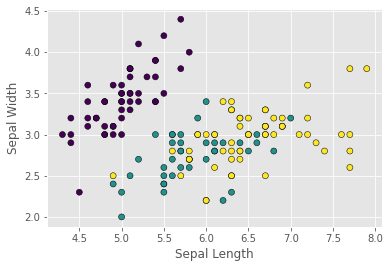

In [10]:
plt.scatter(iris.iloc[:,0], iris.iloc[:,1], c=iris['Species_num'], edgecolor='#000000')
plt.xlabel('Sepal Length', fontsize=12)
plt.ylabel('Sepal Width', fontsize=12);

# So, purple is setosa, the yellow is virginica, and the green is versicolor

In [11]:
X = iris.loc[:, 'Sepal.Length': 'Petal.Width']
y = iris['Species']

In [12]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [13]:
# Instantiate a KMeans model object...
km = KMeans(n_clusters = 3, random_state=42)

# fit (or train) your new model
km.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [14]:
centers = km.cluster_centers_
centers

array([[-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [ 1.13597027,  0.08842168,  0.99615451,  1.01752612],
       [-0.05021989, -0.88337647,  0.34773781,  0.2815273 ]])

In [15]:
labels = km.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

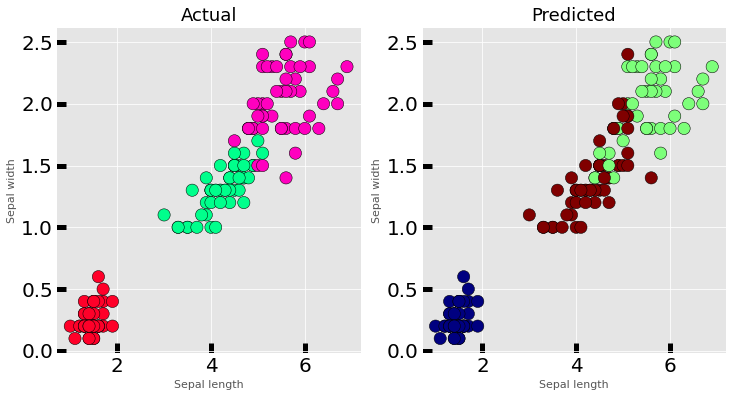

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))


axes[0].scatter(iris.iloc[:, 2], iris.iloc[:, 3], c=iris['Species_num'], cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(iris.iloc[:, 2], iris.iloc[:, 3], c=labels, cmap='jet',
edgecolor='k', s=150)


axes[0].set_xlabel('Sepal length', fontsize=11)
axes[0].set_ylabel('Sepal width', fontsize=11)

axes[1].set_xlabel('Sepal length', fontsize=11)
axes[1].set_ylabel('Sepal width', fontsize=11)


axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18);

In [17]:
# The lower the intertia, the denser the clusters
km.inertia_

139.82049635974968

### Model Evaluation: [Silhouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)
---

The formula for [Silhouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html):

### $s_i = \frac{b_i - a_i}{max\{a_i, b_i\}}$

Where:
- $a_i$ = `Cohesion`: Average distance of points within clusters
- $b_i$ = `Separation`: Average distance from point $x_i$ to all points in the next nearest cluster.


- [A fun little cohesion/separation example](https://cmparlettpelleriti.github.io/CohandSep.html)

In [20]:
# From the scikit documentation...
# The best value is 1 and the worst value is -1. 
# Values near 0 indicate overlapping clusters. 
# Negative values generally indicate that a sample has been 
# assigned to the wrong cluster, as a different cluster is more similar.

score = silhouette_score(X_scaled, km.labels_)
score

0.45994823920518646

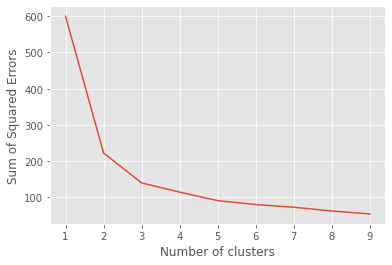

In [21]:
# Could use something referred to as the `elbow method` to find "optimal" k
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(X_scaled)
    # Inertia: Sum of distances of samples to their closest cluster center
    sse[k] = kmeans.inertia_

plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Sum of Squared Errors")
plt.show()

### Ok, now with some made up data with no y or target to compare anything to...

`Make Blobs`
- Generates isotropic Gaussian blobs for clustering.
- `isotropic`: a physical property which has the same value when measured in different directions.
- `Gaussian`: normally distributed

In [22]:
# Create dataset
X, y = make_blobs(
    n_samples    =  200, 
    centers      =  3, 
    n_features   =  2,
    random_state =  0)

df = pd.DataFrame(X, columns=['x', 'y'])
df.head()

,x,y
0,-1.733808,3.798061
1,0.628358,4.460136
2,1.131218,4.681950
3,-1.429179,3.500836
4,1.274508,5.630173


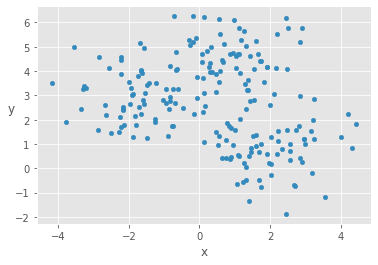

In [23]:
# plot features 
df.plot(kind="scatter", x="x", y="y")
plt.ylabel("y", rotation=0);

There is one major issue that applies to many machine learning models: They are sensitive to feature scale. 

> K-means in particular is sensitive to feature scale because it (by default) uses the Euclidean distance metric. To determine closeness, Euclidean distance sums the square difference along each axis. So, if one axis has large differences and another has small differences, the former axis will contribute much more to the distance than the latter axis.

This means that it matters whether our feature are centered around zero and have similar variance to each other.

Unfortunately, most data does not naturally start at a mean of zero and a shared variance. Other models tend to struggle with scale as well, even linear regression, when you get into more advanced methods such as regularization.


Fortunately, this is an easy fix.

### Use `StandardScaler` to Standardize our Data

StandardScaler standardizes our data by subtracting the mean from each feature and dividing by its standard deviation.

`X_standardized = (x – mean of x) / (standard deviation of x)`

Thus, what we're doing here is shifting the distribution of each feature to have a mean of zero and a standard deviation of one unit variance.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html

<details><summary>Other Scaler options in scikit:</summary>
    
You have a fair number of scaling options in scikit such as the MinMax Scaler and Robust Scaler (more robust to outliers) along with the commonly used StandardScaler. 
    
**An overview of options**: https://python-data-science.readthedocs.io/en/latest/normalisation.html

**MinMax Scaler documentation**: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
```This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.```

**Robust Scaler documentation**: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html
```Standardization of a dataset is a common requirement for many machine learning estimators. Typically this is done by removing the mean and scaling to unit variance. However, outliers can often influence the sample mean / variance in a negative way. In such cases, the median and the interquartile range often give better results.```

```This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).```

In [24]:
# Scale data
ss = StandardScaler()
df_std = ss.fit_transform(df)

In [25]:
# create model 
model = KMeans(n_clusters=3, random_state=0).fit(df_std)

After we fit our data, we can get our predicted labels from `model.labels_` and the center points`model.cluster_centers_`.

In [26]:
# get predictions
model.labels_

array([2, 0, 0, 2, 0, 2, 1, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 1, 2, 2, 2, 1,
       0, 0, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 0, 0, 2, 0, 0, 1, 1, 2,
       1, 1, 2, 1, 1, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 0, 2,
       0, 1, 2, 2, 1, 0, 1, 0, 0, 2, 2, 1, 1, 0, 2, 0, 2, 0, 1, 0, 2, 1,
       0, 2, 1, 0, 0, 0, 0, 1, 2, 2, 1, 1, 2, 0, 1, 2, 2, 1, 2, 0, 2, 1,
       1, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 1, 2, 2, 2,
       0, 1, 1, 1, 0, 0, 1, 2, 2, 2, 0, 0, 1, 2, 1, 1, 2, 1, 0, 1, 2, 2,
       1, 2, 0, 1, 0, 2, 1, 1, 1, 1, 2, 1, 0, 0, 2, 2, 1, 1, 1, 1, 2, 1,
       0, 1], dtype=int32)

In [27]:
df_std[:10]

#type(df_std)

array([[-1.16599172,  0.6032171 ],
       [ 0.11959322,  0.97025621],
       [ 0.3932695 ,  1.09322451],
       [-1.00020063,  0.43844232],
       [ 0.47125406,  1.61889758],
       [-0.63255129, -0.5410497 ],
       [ 1.17975879, -1.3238996 ],
       [ 0.62512529,  0.06499178],
       [ 0.37801155,  1.10643356],
       [-1.15714772, -0.10362912]])

In [28]:
# add predicted labels to dataframe

df_std = pd.DataFrame(df_std, columns=['x', 'y'])

df_std['predicted_group'] = model.labels_
df_std.head()

,x,y,predicted_group
0,-1.165992,0.603217,2
1,0.119593,0.970256,0
2,0.393270,1.093225,0
3,-1.000201,0.438442,2
4,0.471254,1.618898,0


In [29]:
df_std.shape

(200, 3)

In [30]:
#df_std.predicted_group.value_counts()

In [31]:
# get centroids 
centroids = model.cluster_centers_
centroids

# centroids[:, 0]
# centroids[:, 1]

array([[ 0.30929532,  1.03051405],
       [ 0.85744319, -1.05162036],
       [-1.15660567,  0.11234441]])

<a id='verify'></a>
### Visually verifying cluster labels

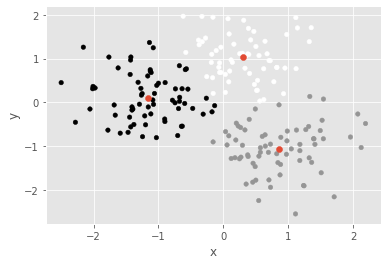

In [32]:
df_std.plot(x="x", y="y", kind="scatter", c=df_std['predicted_group']);
plt.scatter(centroids[:,0], centroids[:,1], marker='o');

#centroids

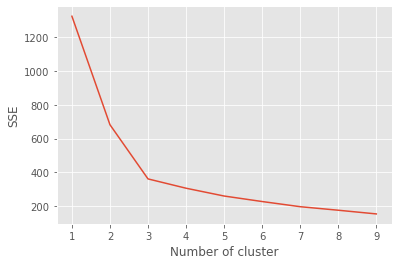

In [33]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(df)
    df["clusters"] = kmeans.labels_
    # Inertia: Sum of distances of samples to their closest cluster center
    sse[k] = kmeans.inertia_

plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [34]:
# Check the silhouette score...
score = silhouette_score(df_std, model.labels_)
score

0.6128411149567774

<a id='conclusion'></a>
## Conclusion: K-Means tradeoffs

---

**K-Means:**
- Unsupervised clustering model
- Conceptually similar to KNN (but for “clustering”)
- Iteratively finds "labels" given K
- Easy to implement in sklearn
- Sensitive to shape, scale of data
- Optimal K hard to evaluate

---

| Strengths | Weaknesses |
| -- | -- |
| K-Means is popular because it's simple and computationally efficient. | However, K-Means is highly scale dependent and isn't suitable for data of varying shapes and densities. |
| Easy to see results / intuitive. | Evaluating results is more subjective, requiring much more human evaluation than trusted metrics. |


### Helpful uses for clustering: 
   - Find items with **similar behavior** (users, products, voters, etc)
   - Market **segmentation**
   - **Discover meaningful categories** for your data
   - **Reduce the number of classes** by grouping
   - **Pre-processing**! Create labels for supervised learning

### Consumer Internet

<table>
    <tr>
        <td><img src="https://snag.gy/EbLeqd.jpg"></td>
        <td><img src="https://snag.gy/xsNvK8.jpg"></td>
    </tr>
</table>


### Business

<table>
    <tr>
    <td><img src="https://snag.gy/pDueQ2.jpg" width="500"></td>
    <td>
        <li>Identifying Demographics</li>
        <li>Spending Patterns</li>
        <li>Consumer Trends</li>
        <li>Customer Characteristics</li>
        <li>Recommender Systems</li>
        <li>Taxonomy / Categorization</li>
    </td>
    </tr>
</table>


| Pros | Cons |
|---|---|
| No labels | Difficult to evaluate correctness without subject matter expertise |
| Few or no assumptions about data | Scaling / normalization often required |
| Useful for subset / segmentation discovery | Can be difficult to visualize |
| Great for broad insights | Extremely difficult to tune |
| Many models avalable | No obvious choice in many cases |
| Black magic | Considered "unconventional" and unreliable |

<a id='resources'></a>

## Additional resources

---

- Andrew Moore's CS class at Carnegie Mellon contains good static visualization, step-by-step. His slide deck is online here: http://www.cs.cmu.edu/~cga/ai-course/kmeans.pdf. He also links to more of his tutorials on the first page. 
- [Sci-Kit Learn Clustering Overview](http://scikit-learn.org/stable/modules/clustering.html#k-means)
- [SKLearn K-Means Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)
- [SKLearn Clustering Code - See `_k_init__` for explanation of k++ centroid selection](https://github.com/scikit-learn/scikit-learn/blob/51a765a/sklearn/cluster/k_means_.py#L769)
- [Clustering Tutorial](http://home.deib.polimi.it/matteucc/Clustering/tutorial_html/)
- [Wikipedia's Deep Dive on Clustering](https://en.wikipedia.org/wiki/K-means_clustering)


**Some helpful stackexchange questions:**
- http://stats.stackexchange.com/questions/40613/why-dont-dummy-variables-have-the-continuous-adjacent-category-problem-in-clust
- http://stats.stackexchange.com/questions/174556/k-means-clustering-with-dummy-variables
- http://datascience.stackexchange.com/questions/22/k-means-clustering-for-mixed-numeric-and-categorical-data


